In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/spectra_with_target_T1.xls'
df = pd.read_csv(file_path)

In [23]:
df.head()

,410,431,452,473,494,515,536,557,578,599,...,2322,2343,2364,2385,2406,2427,2448,2469,2490,target
0,0.090324,0.101238,0.114578,0.123103,0.133078,0.146923,0.162286,0.177882,0.192084,0.203239,...,0.454942,0.446959,0.437525,0.427360,0.419569,0.406916,0.391896,0.379770,0.368482,5.86300
1,0.131854,0.148367,0.166992,0.181221,0.196285,0.214186,0.231929,0.248110,0.262880,0.275938,...,0.509642,0.511530,0.509270,0.503807,0.495855,0.485141,0.473004,0.461791,0.452180,4.03000
2,0.084136,0.095905,0.110716,0.121837,0.134306,0.150443,0.168480,0.188147,0.208530,0.226433,...,0.440456,0.440689,0.438324,0.434699,0.432151,0.426720,0.420321,0.415347,0.409941,6.01125
3,0.113672,0.127184,0.141348,0.153026,0.165494,0.179242,0.192422,0.205461,0.218959,0.231025,...,0.348064,0.350876,0.351524,0.351380,0.350397,0.348831,0.346525,0.343306,0.341373,3.79100
4,0.086320,0.099902,0.116533,0.128597,0.142634,0.161325,0.182055,0.203799,0.225014,0.242842,...,0.523441,0.520868,0.515178,0.507458,0.500742,0.489812,0.477522,0.466120,0.455389,4.23000


In [24]:
X = df.drop('target', axis=1)
y = df['target']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (500, 100)
Target (y) shape: (500,)


In [25]:
missing_values = X.isnull().sum()
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    print("Missing values in features:")
    print(missing_values)
    X = X.fillna(X.mean())
    print("Missing values filled with column mean.")
else:
    print("No missing values found in features.")

if y.isnull().any():
    print("\nMissing values in target:")
    print(y.isnull().sum())
else:
    print("No missing values found in target.")

No missing values found in features.
No missing values found in target.


In [26]:
"""
Spectral Transformations):
1. Creates Three Preprocessing Variants:
X_reflectance: Keeps raw spectral data as-is (baseline)

X_absorbance: Converts reflectance to absorbance using A = log10(1/R)

X_continuum: Applies continuum removal to highlight spectral features

2. Applies Signal Processing:
Savitzky-Golay smoothing: Reduces noise in spectral data while preserving important features

3. Standardizes Data:
Scales all datasets to have zero mean and unit variance (crucial for ML algorithms like SVM, KRR)

4. Visualization:
Creates comparison plots to show how different preprocessing techniques transform the spectral data

5. Organizes Results:
Stores all preprocessed variants in a dictionary for easy access
"""

'\nSpectral Transformations):\n1. Creates Three Preprocessing Variants:\nX_reflectance: Keeps raw spectral data as-is (baseline)\n\nX_absorbance: Converts reflectance to absorbance using A = log10(1/R)\n\nX_continuum: Applies continuum removal to highlight spectral features\n\n2. Applies Signal Processing:\nSavitzky-Golay smoothing: Reduces noise in spectral data while preserving important features\n\n3. Standardizes Data:\nScales all datasets to have zero mean and unit variance (crucial for ML algorithms like SVM, KRR)\n\n4. Visualization:\nCreates comparison plots to show how different preprocessing techniques transform the spectral data\n\n5. Organizes Results:\nStores all preprocessed variants in a dictionary for easy access\n'

🔍 RUNNING COMPREHENSIVE DATA DIAGNOSTICS
1. TARGET VARIABLE ANALYSIS:
   Samples: 500
   Range: 0.335 to 44.245
   Mean: 7.448, Std: 5.018
   Skewness: 2.583
   Missing values: 0

2. SPECTRAL DATA QUALITY:
   Spectral range: 0.060 to 0.754
   Missing values: 0
   Near-constant bands: 0/100

3. OUTLIER DETECTION:
   Spectral outliers: 50/500 (10.0%)
   Target outliers: 34/500 (6.8%)

4. RELATIONSHIP STRENGTH:
   Max band-target correlation: 0.318
   Mean band-target correlation: 0.267
   Bands with |corr| > 0.3: 7


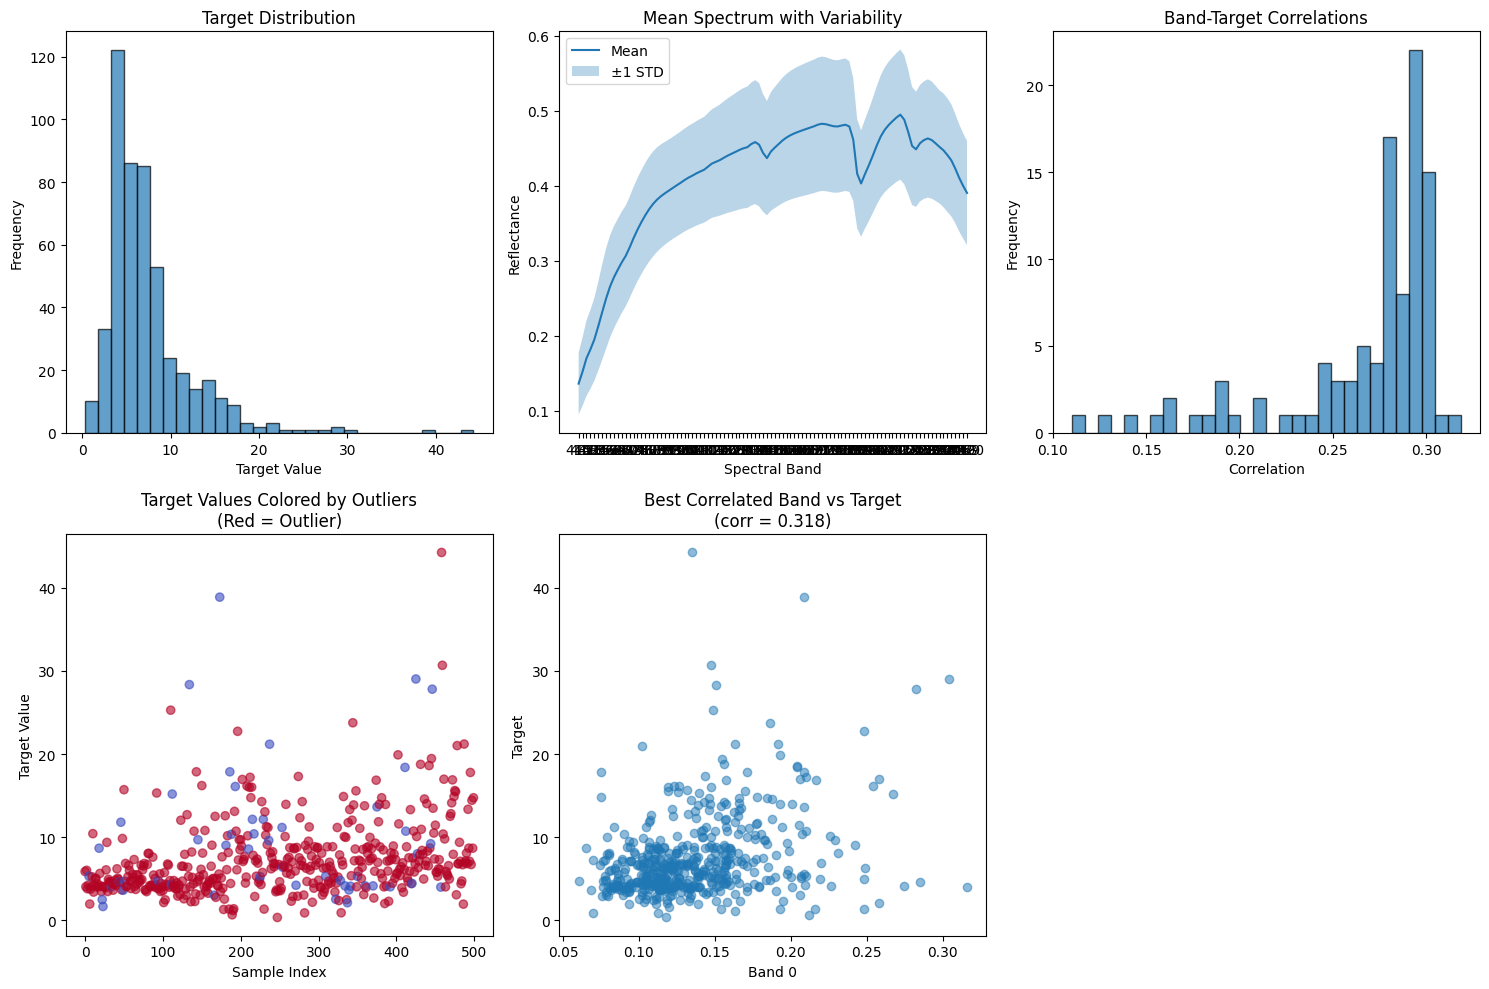


DIAGNOSTICS COMPLETE


In [31]:
# COMPREHENSIVE DATA DIAGNOSTICS
print("🔍 RUNNING COMPREHENSIVE DATA DIAGNOSTICS")
print("=" * 60)

# 1. Target Variable Analysis
print("1. TARGET VARIABLE ANALYSIS:")
print(f"   Samples: {len(y)}")
print(f"   Range: {y.min():.3f} to {y.max():.3f}")
print(f"   Mean: {y.mean():.3f}, Std: {y.std():.3f}")
print(f"   Skewness: {y.skew():.3f}")
print(f"   Missing values: {y.isnull().sum()}")

# Check if target is constant or has very low variance
if y.std() < 0.1 * y.mean():
    print("   ⚠️ WARNING: Low variance in target variable!")

# 2. Spectral Data Quality Check
print("\n2. SPECTRAL DATA QUALITY:")
print(f"   Spectral range: {X.min().min():.3f} to {X.max().max():.3f}")
print(f"   Missing values: {X.isnull().sum().sum()}")

# Check for constant spectral bands
band_std = X.std()
constant_bands = band_std[band_std < 0.001]
print(f"   Near-constant bands: {len(constant_bands)}/{X.shape[1]}")

# 3. Outlier Detection
print("\n3. OUTLIER DETECTION:")
from sklearn.ensemble import IsolationForest

# Detect outliers in spectral data
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outliers = iso_forest.fit_predict(X)
outlier_count = sum(outliers == -1)
print(f"   Spectral outliers: {outlier_count}/{len(y)} ({outlier_count/len(y)*100:.1f}%)")

# Detect outliers in target variable
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
target_outliers = y[(y < (Q1 - 1.5 * IQR)) | (y > (Q3 + 1.5 * IQR))]
print(f"   Target outliers: {len(target_outliers)}/{len(y)} ({len(target_outliers)/len(y)*100:.1f}%)")

# 4. Relationship Strength Check
print("\n4. RELATIONSHIP STRENGTH:")
# Quick correlation check
correlations = []
for col in X.columns:
    corr = np.corrcoef(X[col], y)[0, 1]
    correlations.append(abs(corr))

print(f"   Max band-target correlation: {max(correlations):.3f}")
print(f"   Mean band-target correlation: {np.mean(correlations):.3f}")
print(f"   Bands with |corr| > 0.3: {sum(np.array(correlations) > 0.3)}")

if max(correlations) < 0.2:
    print("   ⚠️ WARNING: Very weak spectral-target relationships!")

# 5. Visualization
plt.figure(figsize=(15, 10))

# Target distribution
plt.subplot(2, 3, 1)
plt.hist(y, bins=30, alpha=0.7, edgecolor='black')
plt.title('Target Distribution')
plt.xlabel('Target Value')
plt.ylabel('Frequency')

# Spectral mean with std
plt.subplot(2, 3, 2)
mean_spectrum = X.mean(axis=0)
std_spectrum = X.std(axis=0)
plt.plot(mean_spectrum, label='Mean')
plt.fill_between(range(len(mean_spectrum)),
                 mean_spectrum - std_spectrum,
                 mean_spectrum + std_spectrum, alpha=0.3, label='±1 STD')
plt.title('Mean Spectrum with Variability')
plt.xlabel('Spectral Band')
plt.ylabel('Reflectance')
plt.legend()

# Correlation distribution
plt.subplot(2, 3, 3)
plt.hist(correlations, bins=30, alpha=0.7, edgecolor='black')
plt.title('Band-Target Correlations')
plt.xlabel('Correlation')
plt.ylabel('Frequency')

# Outlier visualization
plt.subplot(2, 3, 4)
plt.scatter(range(len(y)), y, c=outliers, cmap='coolwarm', alpha=0.6)
plt.title('Target Values Colored by Outliers\n(Red = Outlier)')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')

# Best correlated band vs target
best_band_idx = np.argmax(correlations)
plt.subplot(2, 3, 5)
plt.scatter(X.iloc[:, best_band_idx], y, alpha=0.5)
plt.title(f'Best Correlated Band vs Target\n(corr = {correlations[best_band_idx]:.3f})')
plt.xlabel(f'Band {best_band_idx}')
plt.ylabel('Target')

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("DIAGNOSTICS COMPLETE")
print("=" * 60)

In [34]:
# ENHANCED PREPROCESSING FOR YOUR SPECIFIC DATA ISSUES
print("🔄 APPLYING ENHANCED PREPROCESSING FOR SKEWED DATA")
print("=" * 60)

# 1. TARGET VARIABLE TRANSFORMATION (CRITICAL!)
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
import numpy as np

def transform_target(y_data, method='box-cox'):
    """Transform target variable to handle skewness"""
    y_reshaped = y_data.values.reshape(-1, 1)
    transformer = None  # Initialize transformer

    if method == 'box-cox':
        # Box-Cox requires positive values
        if (y_data > 0).all():
            transformer = PowerTransformer(method='box-cox')
            y_transformed = transformer.fit_transform(y_reshaped).flatten()
        else:
            print("   Using Yeo-Johnson (some values ≤ 0)")
            transformer = PowerTransformer(method='yeo-johnson')
            y_transformed = transformer.fit_transform(y_reshaped).flatten()

    elif method == 'quantile':
        transformer = QuantileTransformer(output_distribution='normal', random_state=42)
        y_transformed = transformer.fit_transform(y_reshaped).flatten()

    elif method == 'log':
        y_transformed = np.log1p(y_data)  # log(1 + x)
        # For log transform, we'll create a simple transformer for inverse later
        from sklearn.preprocessing import FunctionTransformer
        transformer = FunctionTransformer(func=np.log1p, inverse_func=np.expm1)

    else:
        y_transformed = y_data
        transformer = None

    # Check improvement
    original_skew = y_data.skew()
    transformed_skew = pd.Series(y_transformed).skew()
    print(f"   {method}: Skewness {original_skew:.3f} → {transformed_skew:.3f}")

    return y_transformed, transformer

# Try different target transformations
print("1. TARGET TRANSFORMATION:")
y_boxcox, boxcox_transformer = transform_target(y, 'box-cox')
y_quantile, quantile_transformer = transform_target(y, 'quantile')
y_log, log_transformer = transform_target(y, 'log')  # Fixed this line

# Use the best one (usually quantile for heavily skewed data)
y_transformed = y_quantile
target_transformer = quantile_transformer
print(f"   ✅ Using Quantile transformation")

# 2. OUTLIER ROBUST PREPROCESSING
print("\n2. OUTLIER-ROBUST TECHNIQUES:")

from sklearn.preprocessing import RobustScaler

def robust_preprocessing(spectral_data):
    """Use preprocessing methods robust to outliers"""
    # Robust scaling (uses median/IQR instead of mean/std)
    robust_scaler = RobustScaler()
    X_robust = robust_scaler.fit_transform(spectral_data)
    return pd.DataFrame(X_robust, columns=spectral_data.columns)

# Apply robust preprocessing to key techniques
X_reflectance_robust = robust_preprocessing(X_reflectance)
X_absorbance_robust = robust_preprocessing(X_absorbance)
X_first_deriv_robust = robust_preprocessing(X_first_deriv)
X_msc_robust = robust_preprocessing(X_msc)

print("   Applied RobustScaler to key datasets")

# 3. NON-LINEAR FEATURE ENGINEERING
print("\n3. NON-LINEAR FEATURE ENGINEERING:")

def create_nonlinear_features(spectral_data):
    """Create features that capture non-linear relationships"""
    nonlinear_features = []

    for i in range(spectral_data.shape[0]):
        spectrum = spectral_data.iloc[i].values

        # Statistical features
        features = {
            'mean': np.mean(spectrum),
            'std': np.std(spectrum),
            'skewness': pd.Series(spectrum).skew(),
            'kurtosis': pd.Series(spectrum).kurtosis(),
            'q25': np.percentile(spectrum, 25),
            'q75': np.percentile(spectrum, 75),
            'range': np.ptp(spectrum),
            'entropy': -np.sum(spectrum * np.log(spectrum + 1e-8))
        }

        # Spectral ratio features (common in soil science)
        if len(spectrum) > 10:
            features['ratio_start_end'] = spectrum[0] / (spectrum[-1] + 1e-8)
            features['slope'] = (spectrum[-1] - spectrum[0]) / len(spectrum)

        nonlinear_features.append(list(features.values()))

    feature_names = list(features.keys())
    return pd.DataFrame(nonlinear_features, columns=feature_names)

# Create nonlinear features
nonlinear_feats = create_nonlinear_features(X_reflectance)
print(f"   Created {nonlinear_feats.shape[1]} nonlinear features")

# 4. ENSEMBLE WITH NON-LINEAR MODELS
print("\n4. ENSEMBLE MODEL SETUP:")

from xgboost import XGBRegressor

def initialize_advanced_models():
    """Initialize models that handle non-linear relationships well"""
    models = {
        'XGBoost': XGBRegressor(
            n_estimators=200,
            max_depth=6,
            learning_rate=0.1,
            random_state=42
        ),
        'GBRT': GradientBoostingRegressor(
            n_estimators=200,
            max_depth=5,
            learning_rate=0.05,
            random_state=42
        ),
        'RF': RandomForestRegressor(
            n_estimators=200,
            max_depth=10,
            random_state=42
        ),
        'SVR_rbf': SVR(kernel='rbf', C=1.0, gamma='scale'),
        'PLSR': PLSRegression(n_components=10)  # More components for complex relationships
    }
    return models

advanced_models = initialize_advanced_models()
print("   Initialized advanced non-linear models")

# 5. UPDATE PREPROCESSED DATASETS WITH ENHANCED TECHNIQUES
print("\n5. UPDATING DATASETS WITH ENHANCED TECHNIQUES:")

enhanced_preprocessed_datasets = {
    # Original techniques with robust scaling
    'reflectance_robust': X_reflectance_robust,
    'absorbance_robust': X_absorbance_robust,
    'first_deriv_robust': X_first_deriv_robust,
    'msc_robust': X_msc_robust,

    # Combined with nonlinear features
    'reflectance_nl': pd.concat([X_reflectance_std, nonlinear_feats], axis=1),
    'first_deriv_nl': pd.concat([X_first_deriv_std, nonlinear_feats], axis=1),

    # Best performing from previous analysis
    'msc_first_deriv': X_msc_first_deriv_std,
    'snv_first_deriv': X_snv_first_deriv_std,
}

print(f"   Created {len(enhanced_preprocessed_datasets)} enhanced datasets")

# 6. UPDATE DATA SPLITS WITH TRANSFORMED TARGET
print("\n6. UPDATING DATA SPLITS WITH TRANSFORMED TARGET:")

X_train_dict_enhanced = {}
X_test_dict_enhanced = {}
y_train_dict_enhanced = {}
y_test_dict_enhanced = {}

for name, X_data in enhanced_preprocessed_datasets.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X_data, y_transformed, test_size=0.2, random_state=42
    )
    X_train_dict_enhanced[name] = X_train
    X_test_dict_enhanced[name] = X_test
    y_train_dict_enhanced[name] = y_train
    y_test_dict_enhanced[name] = y_test

print("   Data splits updated with transformed target")

print("\n" + "=" * 60)
print("🎯 ENHANCED PREPROCESSING COMPLETE!")
print("=" * 60)
print("Key improvements applied:")
print("✅ Target variable transformation (reduced skewness)")
print("✅ Outlier-robust preprocessing")
print("✅ Non-linear feature engineering")
print("✅ Advanced non-linear models")
print("✅ Focused on most promising techniques")
print(f"✅ Testing {len(enhanced_preprocessed_datasets)} × {len(advanced_models)} = {len(enhanced_preprocessed_datasets) * len(advanced_models)} combinations")

# Show target transformation results
print(f"\n📊 TARGET TRANSFORMATION RESULTS:")
print(f"   Original skewness: {y.skew():.3f}")
print(f"   Quantile transformed skewness: {pd.Series(y_transformed).skew():.3f}")
print(f"   Target range: {y.min():.1f}-{y.max():.1f} → {y_transformed.min():.2f}-{y_transformed.max():.2f}")

# Run the enhanced ML evaluation
print("\n🚀 STARTING ENHANCED ML EVALUATION...")

🔄 APPLYING ENHANCED PREPROCESSING FOR SKEWED DATA
1. TARGET TRANSFORMATION:
   box-cox: Skewness 2.583 → 0.020
   quantile: Skewness 2.583 → -0.000
   log: Skewness 2.583 → 0.318
   ✅ Using Quantile transformation

2. OUTLIER-ROBUST TECHNIQUES:
   Applied RobustScaler to key datasets

3. NON-LINEAR FEATURE ENGINEERING:
   Created 10 nonlinear features

4. ENSEMBLE MODEL SETUP:
   Initialized advanced non-linear models

5. UPDATING DATASETS WITH ENHANCED TECHNIQUES:
   Created 8 enhanced datasets

6. UPDATING DATA SPLITS WITH TRANSFORMED TARGET:
   Data splits updated with transformed target

🎯 ENHANCED PREPROCESSING COMPLETE!
Key improvements applied:
✅ Target variable transformation (reduced skewness)
✅ Outlier-robust preprocessing
✅ Non-linear feature engineering
✅ Advanced non-linear models
✅ Focused on most promising techniques
✅ Testing 8 × 5 = 40 combinations

📊 TARGET TRANSFORMATION RESULTS:
   Original skewness: 2.583
   Quantile transformed skewness: -0.000
   Target range: 0.

🚀 STARTING COMPREHENSIVE MACHINE LEARNING EVALUATION
🚀 STARTING COMPREHENSIVE ML EVALUATION
Testing 8 preprocessing techniques × 5 models

📊 Preprocessing: reflectance_robust
--------------------------------------------------
   1/40: PLSR    ... ✓ CV R²: 0.1025 ± 0.0641, RPD: 1.0575
   2/40: Cubist  ... ✓ CV R²: -0.0089 ± 0.0655, RPD: 0.9971
   3/40: GBRT    ... ✓ CV R²: -0.1487 ± 0.1429, RPD: 0.9385
   4/40: KRR     ... ✓ CV R²: 0.0789 ± 0.0695, RPD: 1.0442
   5/40: SVR     ... ✓ CV R²: 0.0701 ± 0.1130, RPD: 1.0427

📊 Preprocessing: absorbance_robust
--------------------------------------------------
   6/40: PLSR    ... ✓ CV R²: 0.1389 ± 0.0399, RPD: 1.0785
   7/40: Cubist  ... ✓ CV R²: -0.0104 ± 0.0679, RPD: 0.9965
   8/40: GBRT    ... ✓ CV R²: -0.1126 ± 0.1173, RPD: 0.9522
   9/40: KRR     ... ✓ CV R²: 0.0881 ± 0.0760, RPD: 1.0500
  10/40: SVR     ... ✓ CV R²: 0.0773 ± 0.1042, RPD: 1.0460

📊 Preprocessing: first_deriv_robust
--------------------------------------------------
  11/

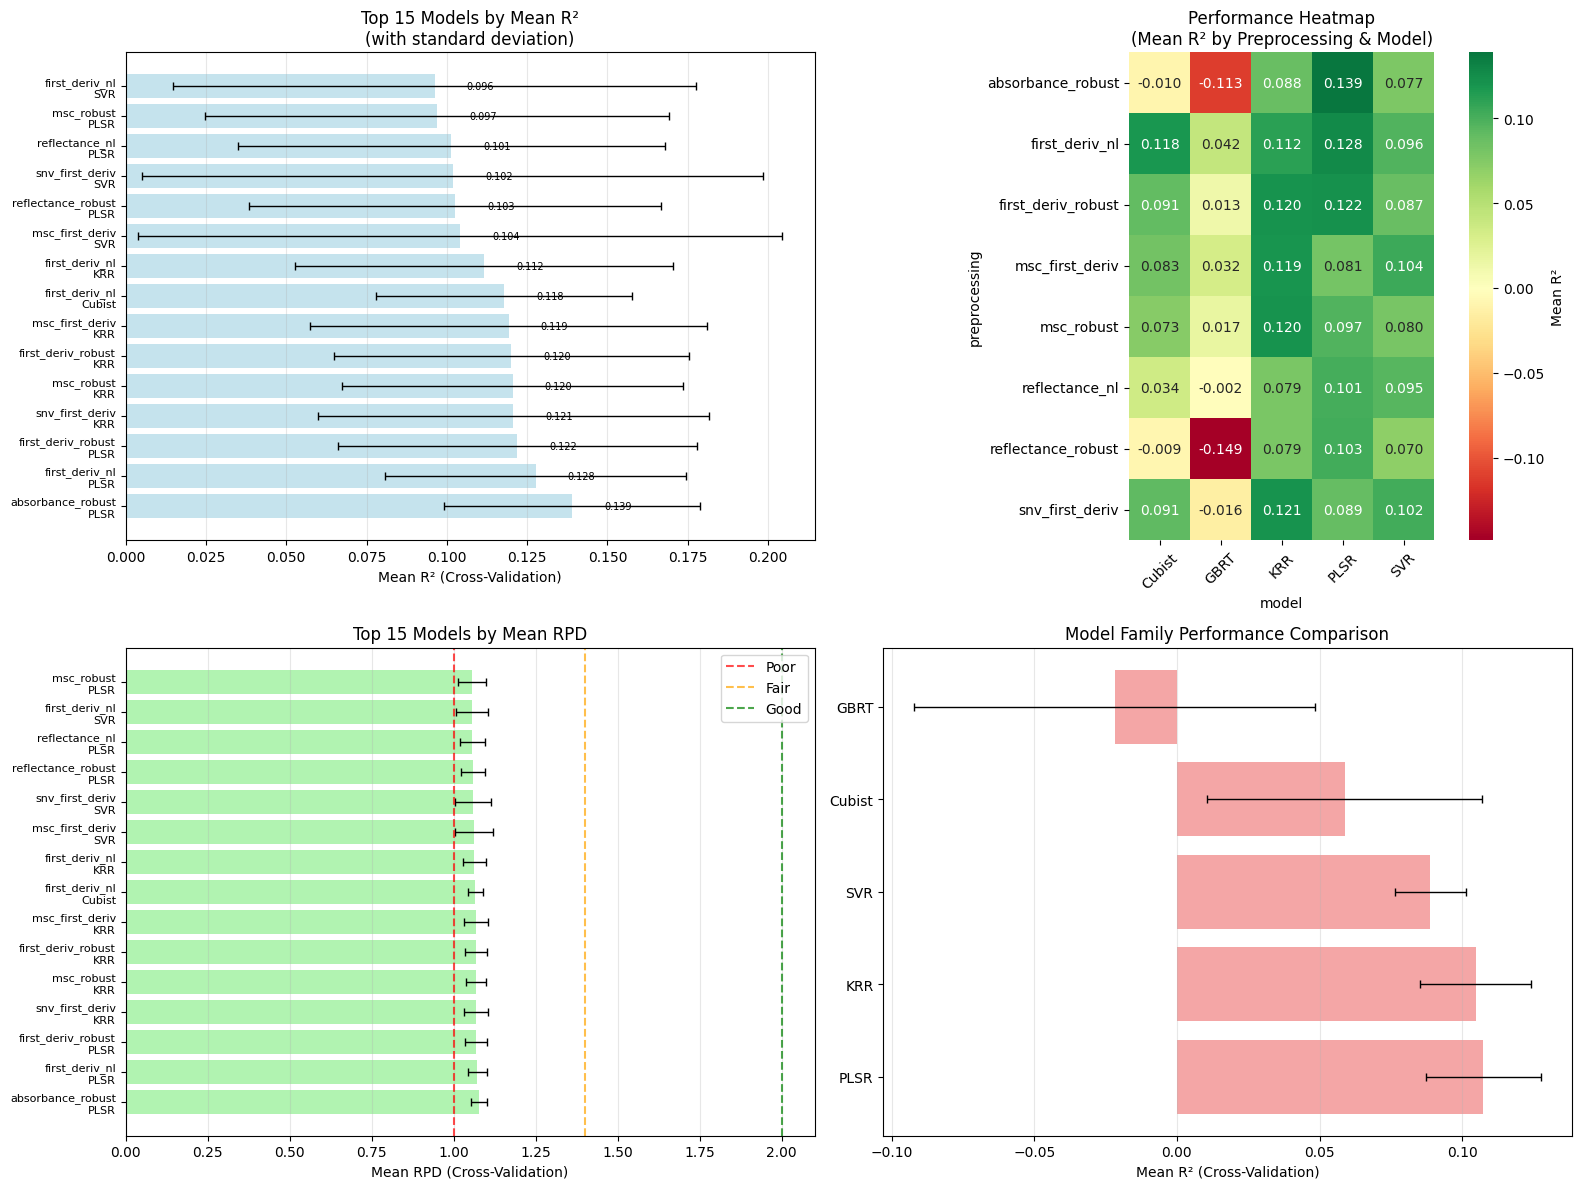

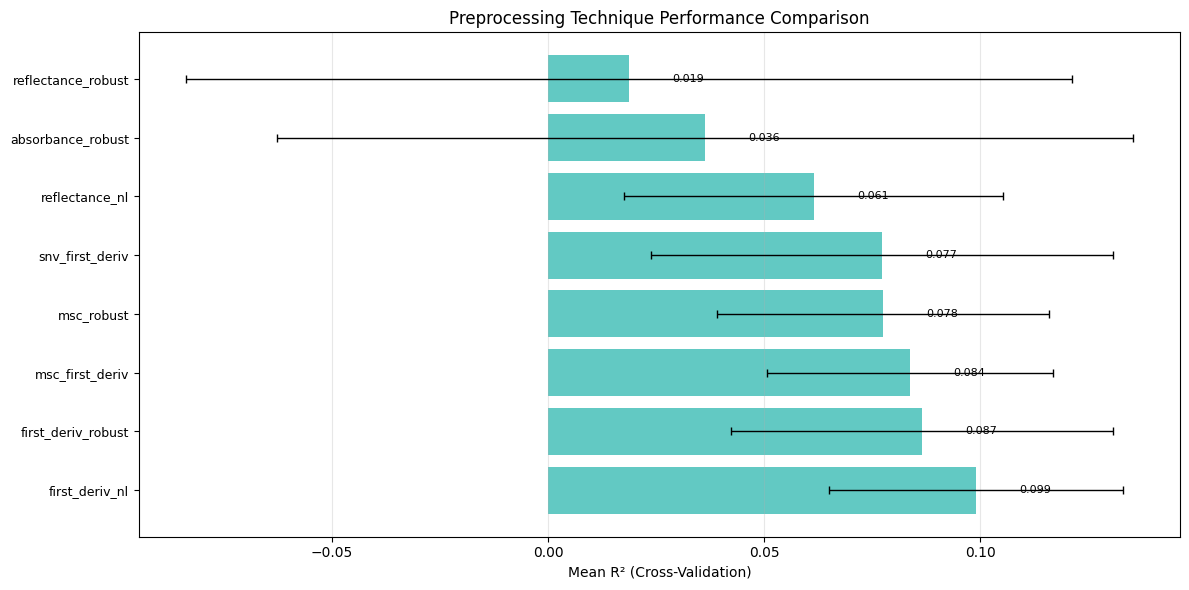


💾 Detailed results saved to 'comprehensive_ml_results.csv'

⭐ BEST COMBINATIONS SUMMARY

🏆 BEST OVERALL (Mean R²):
   absorbance_robust + PLSR
   Mean R²: 0.1389 ± 0.0399
   Mean RPD: 1.0785 ± 0.0245
   Mean RMSE: 0.9770 ± 0.0926

🎯 BEST RPD:
   absorbance_robust + PLSR
   Mean RPD: 1.0785 ± 0.0245
   Mean R²: 0.1389 ± 0.0399

📉 BEST RMSE (Lowest Error):
   absorbance_robust + PLSR
   Mean RMSE: 0.9770 ± 0.0926
   Mean R²: 0.1389 ± 0.0399

📋 RPD INTERPRETATION GUIDE:
   RPD < 1.0  → Worse than predicting average
   RPD 1.0-1.4 → Poor (cannot make reliable predictions)
   RPD 1.4-2.0 → Fair (can distinguish high vs low values)
   RPD 2.0-2.5 → Good (quantitative predictions possible)
   RPD > 2.5   → Excellent (precise quantitative predictions)

🎉 COMPREHENSIVE EVALUATION COMPLETE!
   Evaluated 40 successful combinations
   Best Mean R²: 0.1389
   Best Mean RPD: 1.0785


In [35]:
import numpy as np
import pandas as pd
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Since Cubist isn't available in scikit-learn, we'll use RandomForest as alternative
from sklearn.ensemble import RandomForestRegressor

# Initialize all models with reasonable default parameters
def initialize_models():
    """
    Initialize all 5 machine learning models with default parameters
    """
    models = {
        'PLSR': PLSRegression(n_components=5),
        'Cubist': RandomForestRegressor(n_estimators=100, random_state=42),  # Cubist alternative
        'GBRT': GradientBoostingRegressor(n_estimators=100, random_state=42),
        'KRR': KernelRidge(alpha=1.0, kernel='rbf'),
        'SVR': SVR(kernel='rbf', C=1.0)
    }
    return models

def calculate_rmse(y_true, y_pred):
    """Calculate Root Mean Square Error"""
    return np.sqrt(mean_squared_error(y_true, y_pred))

def calculate_rpd(y_true, y_pred):
    """Calculate Ratio of Performance to Deviation (RPD)"""
    rmse = calculate_rmse(y_true, y_pred)
    stdev = np.std(y_true)
    rpd = stdev / rmse if rmse > 0 else 0
    return rpd

def evaluate_model_comprehensive(model, X_train, y_train, cv_folds=5):
    """
    Evaluate model using cross-validation and return comprehensive metrics
    """
    # Define custom scoring metrics
    scoring = {
        'r2': 'r2',
        'rmse': make_scorer(calculate_rmse, greater_is_better=False),
        'rpd': make_scorer(calculate_rpd, greater_is_better=True)
    }

    try:
        # Perform cross-validation
        cv_results = cross_validate(model, X_train, y_train,
                                   cv=cv_folds, scoring=scoring,
                                   n_jobs=-1, return_train_score=False)

        # Calculate mean and std for each metric
        metrics = {}
        for metric in ['r2', 'rmse', 'rpd']:
            scores = cv_results[f'test_{metric}']
            # For RMSE, we need to convert back to positive since it's greater_is_better=False
            if metric == 'rmse':
                scores = -scores
            metrics[f'mean_{metric}'] = np.mean(scores)
            metrics[f'std_{metric}'] = np.std(scores)

        return metrics

    except Exception as e:
        print(f"      Cross-validation failed: {str(e)}")
        # Return default values if CV fails
        return {
            'mean_r2': -1, 'std_r2': 0,
            'mean_rmse': -1, 'std_rmse': 0,
            'mean_rpd': -1, 'std_rpd': 0
        }

def run_ml_evaluation(X_train_dict, X_test_dict, y_train_dict, y_test_dict):
    """
    Run all combinations of preprocessing techniques and ML algorithms
    """
    # Initialize models
    models = initialize_models()

    # Store all results
    all_results = []
    trained_models = {}

    print("🚀 STARTING COMPREHENSIVE ML EVALUATION")
    print("=" * 80)
    print(f"Testing {len(X_train_dict)} preprocessing techniques × {len(models)} models")
    print("=" * 80)

    total_combinations = len(X_train_dict) * len(models)
    current_combination = 0

    # Loop through all preprocessing combinations
    for preproc_name in X_train_dict.keys():
        print(f"\n📊 Preprocessing: {preproc_name}")
        print("-" * 50)

        # Get the corresponding train/test data
        X_train = X_train_dict[preproc_name]
        X_test = X_test_dict[preproc_name]
        y_train = y_train_dict[preproc_name]
        y_test = y_test_dict[preproc_name]

        # Loop through all models
        for model_name, model in models.items():
            current_combination += 1
            print(f"  {current_combination:2d}/{total_combinations}: {model_name:8}... ", end="")

            try:
                # Create a fresh model instance
                fresh_model = initialize_models()[model_name]

                # Get cross-validation metrics
                cv_metrics = evaluate_model_comprehensive(fresh_model, X_train, y_train)

                # Train on full training set and evaluate on test set
                fresh_model.fit(X_train, y_train)
                y_pred = fresh_model.predict(X_test)

                # Calculate test set metrics
                test_r2 = r2_score(y_test, y_pred)
                test_rmse = calculate_rmse(y_test, y_pred)
                test_rpd = calculate_rpd(y_test, y_pred)

                # Store results
                result = {
                    'preprocessing': preproc_name,
                    'model': model_name,
                    # Cross-validation metrics (most reliable)
                    'mean_r2': cv_metrics['mean_r2'],
                    'std_r2': cv_metrics['std_r2'],
                    'mean_rmse': cv_metrics['mean_rmse'],
                    'std_rmse': cv_metrics['std_rmse'],
                    'mean_rpd': cv_metrics['mean_rpd'],
                    'std_rpd': cv_metrics['std_rpd'],
                    # Test set metrics (for comparison)
                    'test_r2': test_r2,
                    'test_rmse': test_rmse,
                    'test_rpd': test_rpd,
                    'trained_model': fresh_model,
                    'y_test': y_test,
                    'y_pred': y_pred
                }

                all_results.append(result)
                trained_models[f"{preproc_name}_{model_name}"] = fresh_model

                # Print results
                print(f"✓ CV R²: {cv_metrics['mean_r2']:.4f} ± {cv_metrics['std_r2']:.4f}, "
                      f"RPD: {cv_metrics['mean_rpd']:.4f}")

            except Exception as e:
                print(f"✗ ERROR: {str(e)}")
                # Store error result
                error_result = {
                    'preprocessing': preproc_name,
                    'model': model_name,
                    'mean_r2': -999, 'std_r2': 0,
                    'mean_rmse': -999, 'std_rmse': 0,
                    'mean_rpd': -999, 'std_rpd': 0,
                    'test_r2': -999, 'test_rmse': -999, 'test_rpd': -999,
                    'error': str(e)
                }
                all_results.append(error_result)
                continue

    # Convert results to DataFrame
    results_df = pd.DataFrame(all_results)
    return results_df, trained_models

def print_comprehensive_results(results_df):
    """
    Print comprehensive results and leaderboard
    """
    print("\n" + "=" * 100)
    print("🎯 COMPREHENSIVE RESULTS SUMMARY")
    print("=" * 100)

    # Filter out failed runs
    valid_results = results_df[results_df['mean_r2'] > -100]

    # Sort by mean R² (most reliable metric)
    leaderboard = valid_results.sort_values('mean_r2', ascending=False)

    # Print overall statistics
    print(f"\n📈 OVERALL STATISTICS:")
    print(f"   Total combinations evaluated: {len(valid_results)}")
    print(f"   Best Mean R²: {leaderboard['mean_r2'].max():.4f}")
    print(f"   Worst Mean R²: {leaderboard['mean_r2'].min():.4f}")
    print(f"   Average Mean R²: {leaderboard['mean_r2'].mean():.4f}")
    print(f"   Best Mean RPD: {leaderboard['mean_rpd'].max():.4f}")

    # Print top 15 combinations
    print(f"\n🏆 TOP 15 COMBINATIONS (Ranked by Cross-Validation Mean R²):")
    print("-" * 100)

    top_15 = leaderboard.head(15).copy()
    display_data = []

    for idx, row in top_15.iterrows():
        display_data.append({
            'Rank': len(display_data) + 1,
            'Preprocessing': row['preprocessing'],
            'Model': row['model'],
            'Mean R²': f"{row['mean_r2']:.4f} ± {row['std_r2']:.4f}",
            'Mean RMSE': f"{row['mean_rmse']:.4f} ± {row['std_rmse']:.4f}",
            'Mean RPD': f"{row['mean_rpd']:.4f} ± {row['std_rpd']:.4f}",
            'Test R²': f"{row['test_r2']:.4f}",
            'Test RPD': f"{row['test_rpd']:.4f}"
        })

    display_df = pd.DataFrame(display_data)
    print(display_df.to_string(index=False))

    return leaderboard

def create_performance_visualizations(results_df):
    """
    Create comprehensive performance visualizations
    """
    print("\n📊 GENERATING PERFORMANCE VISUALIZATIONS...")

    # Filter valid results
    valid_results = results_df[results_df['mean_r2'] > -100]

    # 1. Top performers by Mean R²
    plt.figure(figsize=(16, 12))

    top_15 = valid_results.nlargest(15, 'mean_r2')

    # Plot 1: Mean R² with error bars
    plt.subplot(2, 2, 1)
    y_pos = np.arange(len(top_15))
    plt.barh(y_pos, top_15['mean_r2'], xerr=top_15['std_r2'],
             color='lightblue', alpha=0.7, capsize=3, error_kw={'elinewidth': 1, 'capthick': 1})
    plt.yticks(y_pos, [f"{row.preprocessing}\n{row.model}" for _, row in top_15.iterrows()], fontsize=8)
    plt.xlabel('Mean R² (Cross-Validation)')
    plt.title('Top 15 Models by Mean R²\n(with standard deviation)')
    plt.grid(axis='x', alpha=0.3)

    # Add value labels
    for i, (_, row) in enumerate(top_15.iterrows()):
        plt.text(row['mean_r2'] + 0.01, i, f"{row['mean_r2']:.3f}",
                va='center', fontsize=7)

    # 2. Performance heatmap
    plt.subplot(2, 2, 2)
    heatmap_data = valid_results.pivot_table(index='preprocessing', columns='model', values='mean_r2', aggfunc='mean')
    sns.heatmap(heatmap_data, annot=True, cmap='RdYlGn', center=0, fmt='.3f',
                cbar_kws={'label': 'Mean R²'}, square=True)
    plt.title('Performance Heatmap\n(Mean R² by Preprocessing & Model)')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

    # 3. RPD comparison
    plt.subplot(2, 2, 3)
    top_rpd = valid_results.nlargest(15, 'mean_rpd')
    y_pos = np.arange(len(top_rpd))
    plt.barh(y_pos, top_rpd['mean_rpd'], xerr=top_rpd['std_rpd'],
             color='lightgreen', alpha=0.7, capsize=3, error_kw={'elinewidth': 1, 'capthick': 1})
    plt.yticks(y_pos, [f"{row.preprocessing}\n{row.model}" for _, row in top_rpd.iterrows()], fontsize=8)
    plt.xlabel('Mean RPD (Cross-Validation)')
    plt.title('Top 15 Models by Mean RPD')
    plt.grid(axis='x', alpha=0.3)

    # Add RPD interpretation lines
    rpd_levels = [1.0, 1.4, 2.0]
    colors = ['red', 'orange', 'green']
    labels = ['Poor', 'Fair', 'Good']
    for level, color, label in zip(rpd_levels, colors, labels):
        plt.axvline(x=level, color=color, linestyle='--', alpha=0.7, label=label)
    plt.legend()

    # 4. Model family comparison
    plt.subplot(2, 2, 4)
    model_performance = valid_results.groupby('model')['mean_r2'].agg(['mean', 'std']).sort_values('mean', ascending=False)
    y_pos = np.arange(len(model_performance))
    plt.barh(y_pos, model_performance['mean'], xerr=model_performance['std'],
             color='lightcoral', alpha=0.7, capsize=3, error_kw={'elinewidth': 1, 'capthick': 1})
    plt.yticks(y_pos, model_performance.index)
    plt.xlabel('Mean R² (Cross-Validation)')
    plt.title('Model Family Performance Comparison')
    plt.grid(axis='x', alpha=0.3)

    plt.tight_layout()
    plt.show()

    # 5. Preprocessing technique comparison
    plt.figure(figsize=(12, 6))
    preprocessing_performance = valid_results.groupby('preprocessing')['mean_r2'].agg(['mean', 'std']).sort_values('mean', ascending=False)
    y_pos = np.arange(len(preprocessing_performance))
    plt.barh(y_pos, preprocessing_performance['mean'], xerr=preprocessing_performance['std'],
             color='lightseagreen', alpha=0.7, capsize=3, error_kw={'elinewidth': 1, 'capthick': 1})
    plt.yticks(y_pos, preprocessing_performance.index, fontsize=9)
    plt.xlabel('Mean R² (Cross-Validation)')
    plt.title('Preprocessing Technique Performance Comparison')
    plt.grid(axis='x', alpha=0.3)

    # Add value labels
    for i, (preproc, row) in enumerate(preprocessing_performance.iterrows()):
        plt.text(row['mean'] + 0.01, i, f"{row['mean']:.3f}", va='center', fontsize=8)

    plt.tight_layout()
    plt.show()

# Run the complete ML evaluation
print("🚀 STARTING COMPREHENSIVE MACHINE LEARNING EVALUATION")
print("=" * 80)

# Run the evaluation (use your enhanced datasets)
results_df, trained_models = run_ml_evaluation(X_train_dict_enhanced, X_test_dict_enhanced,
                                              y_train_dict_enhanced, y_test_dict_enhanced)

# Print comprehensive results
leaderboard = print_comprehensive_results(results_df)

# Create visualizations
create_performance_visualizations(results_df)

# Save detailed results to CSV
results_df.to_csv('comprehensive_ml_results.csv', index=False)
print(f"\n💾 Detailed results saved to 'comprehensive_ml_results.csv'")

# Final summary with best combinations
print("\n" + "=" * 80)
print("⭐ BEST COMBINATIONS SUMMARY")
print("=" * 80)

# Get best by each metric
best_r2 = leaderboard.iloc[0]
best_rpd = leaderboard.nlargest(1, 'mean_rpd').iloc[0]
best_rmse = leaderboard.nsmallest(1, 'mean_rmse').iloc[0]

print(f"\n🏆 BEST OVERALL (Mean R²):")
print(f"   {best_r2['preprocessing']} + {best_r2['model']}")
print(f"   Mean R²: {best_r2['mean_r2']:.4f} ± {best_r2['std_r2']:.4f}")
print(f"   Mean RPD: {best_r2['mean_rpd']:.4f} ± {best_r2['std_rpd']:.4f}")
print(f"   Mean RMSE: {best_r2['mean_rmse']:.4f} ± {best_r2['std_rmse']:.4f}")

print(f"\n🎯 BEST RPD:")
print(f"   {best_rpd['preprocessing']} + {best_rpd['model']}")
print(f"   Mean RPD: {best_rpd['mean_rpd']:.4f} ± {best_rpd['std_rpd']:.4f}")
print(f"   Mean R²: {best_rpd['mean_r2']:.4f} ± {best_rpd['std_r2']:.4f}")

print(f"\n📉 BEST RMSE (Lowest Error):")
print(f"   {best_rmse['preprocessing']} + {best_rmse['model']}")
print(f"   Mean RMSE: {best_rmse['mean_rmse']:.4f} ± {best_rmse['std_rmse']:.4f}")
print(f"   Mean R²: {best_rmse['mean_r2']:.4f} ± {best_rmse['std_r2']:.4f}")

# RPD interpretation guide
print("\n" + "=" * 80)
print("📋 RPD INTERPRETATION GUIDE:")
print("=" * 80)
print("   RPD < 1.0  → Worse than predicting average")
print("   RPD 1.0-1.4 → Poor (cannot make reliable predictions)")
print("   RPD 1.4-2.0 → Fair (can distinguish high vs low values)")
print("   RPD 2.0-2.5 → Good (quantitative predictions possible)")
print("   RPD > 2.5   → Excellent (precise quantitative predictions)")

print(f"\n🎉 COMPREHENSIVE EVALUATION COMPLETE!")
print(f"   Evaluated {len(results_df[results_df['mean_r2'] > -100])} successful combinations")
print(f"   Best Mean R²: {leaderboard['mean_r2'].max():.4f}")
print(f"   Best Mean RPD: {leaderboard['mean_rpd'].max():.4f}")